In [1]:
%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [2]:
import numpy as np
import time, os
import imgaug
from imageio import imread 

In [3]:
## Make simple test image

In [4]:
img = np.zeros((1024, 1024, 3), dtype=np.uint8)
img[:200, :200, 0] = 255
img[-200:, :, 1] = 255
img[:, 412:612, 2] = 255

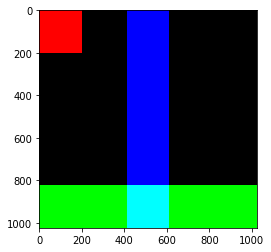

In [5]:
imshow(img)

In [6]:
## imgaug

In [7]:
from imgaug import augmenters as iaa


In [8]:
imgaug.__version__

'0.3.0'

In [9]:
import cv2
cv2.setNumThreads(0)

In [10]:
#seq = iaa.Affine(rotate=[0, 90, 180, 270])
seq = iaa.Affine(rotate=(0, 360))

In [11]:
#state = seq.random_state.state
state = imgaug.random.RNG(123).state

In [12]:
import random as py_random

In [13]:
def _set_state(s):
    #seq.random_state = s
    imgaug.seed(123)
    imgaug.random.seed(123)
    imgaug.random.get_global_rng().set_state_(s)
    np.random.seed(123)
    py_random.seed(123)
    seq.random_state.set_state_(s)
    


In [14]:
_set_state(state)

output = []
for i in range(5):
    output.append(seq.augment_image(img))

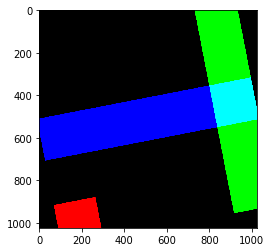

In [15]:
imshow(output[0])

In [16]:
_set_state(state)

output2 = []
for i in range(5):
    output2.append(seq.augment_image(img))

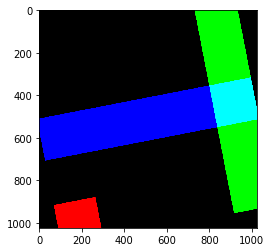

In [17]:
imshow(output2[0])

In [18]:
_set_state(state)

output3 = []
for i in range(5):
    output3.append(seq.augment_image(img))

## This works ... 

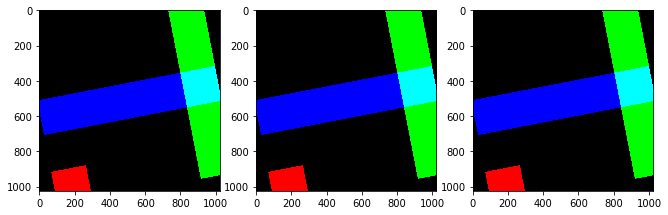

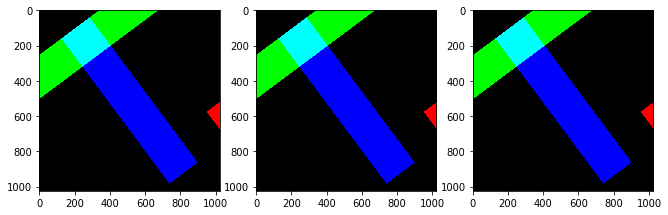

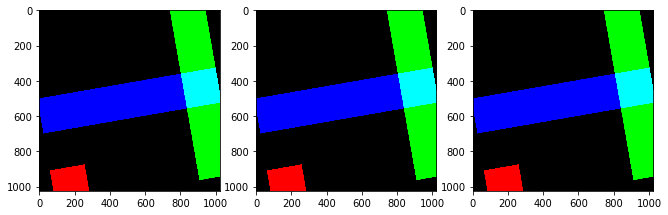

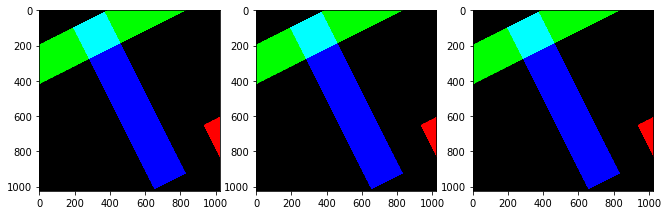

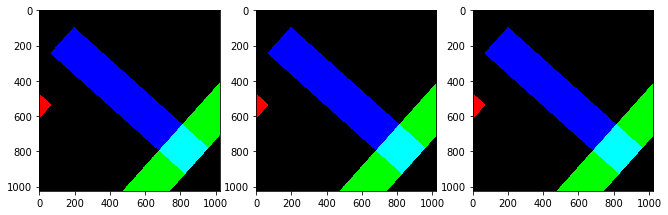

In [19]:
for img, img2, img3 in zip(output, output2, output3):
    figure(figsize=(11,5))
    subplot(1,3,1)
    imshow(img)
    subplot(1,3,2)
    imshow(img2)
    subplot(1,3,3)
    imshow(img3)
    

## Pause a sec and re-run 

In [20]:
## Re-run output3 
_set_state(state)

output3 = []
for i in range(5):
    output3.append(seq.augment_image(img))
    

In [21]:
## Now output3 is different 

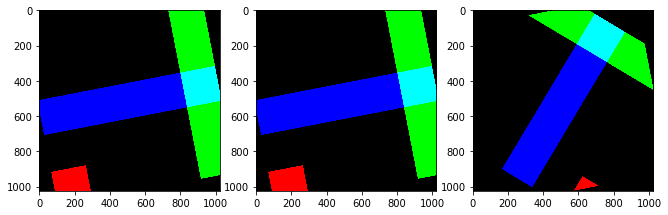

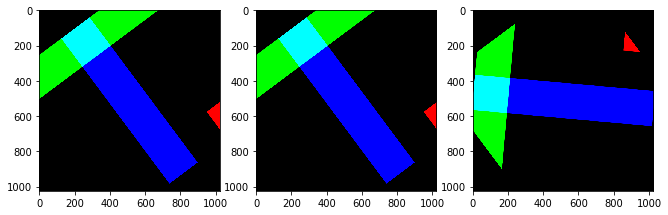

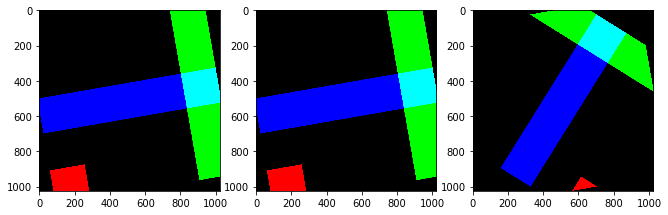

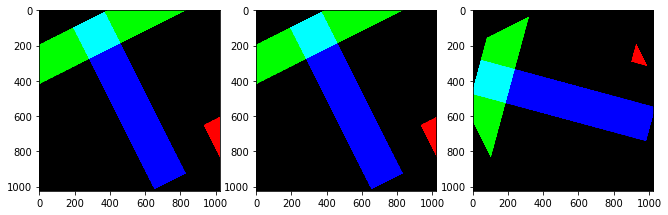

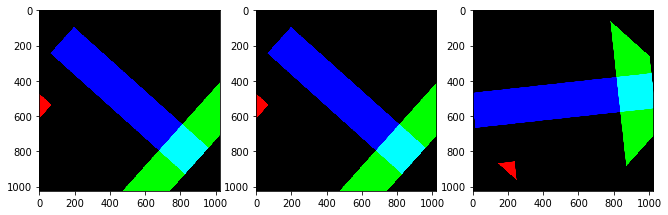

In [22]:
for img, img2, img3 in zip(output, output2, output3):
    figure(figsize=(11,5))
    subplot(1,3,1)
    imshow(img)
    subplot(1,3,2)
    imshow(img2)
    subplot(1,3,3)
    imshow(img3)
    

## seq.to_deterministic() works

In [22]:
seq2 = seq.to_deterministic()

In [23]:
output = []
for i in range(5):
    output.append(seq2.augment_image(img))


In [24]:
output2 = []
for i in range(5):
    output2.append(seq2.augment_image(img))

In [25]:
output3 = []
for i in range(5):
    output3.append(seq2.augment_image(img))


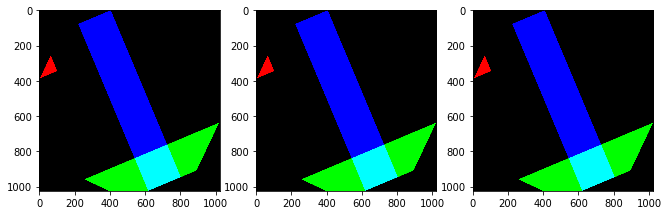

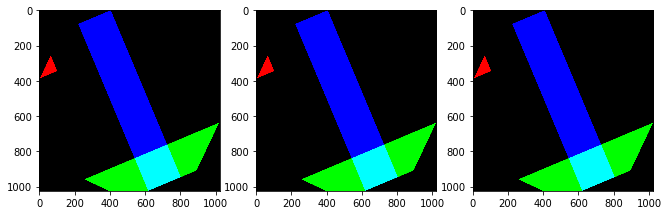

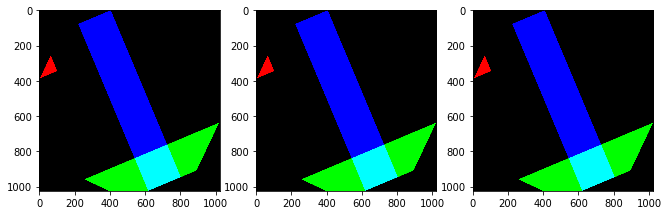

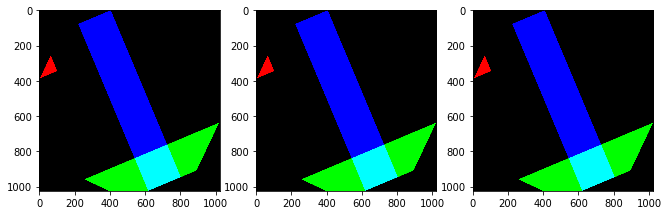

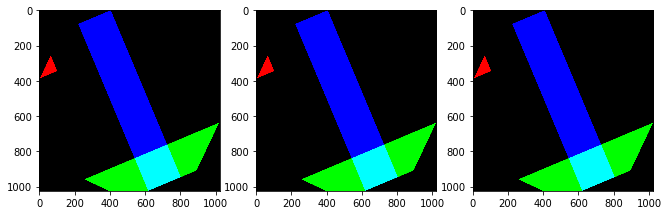

In [26]:
for img, img2, img3 in zip(output, output2, output3):
    figure(figsize=(11,5))
    subplot(1,3,1)
    imshow(img)
    subplot(1,3,2)
    imshow(img2)
    subplot(1,3,3)
    imshow(img3)
    